CNN-Image classify

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import cv2
import os
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/sharks/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))
validation_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/sharks/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

model = tf.keras.applications.InceptionV3(weights=None, input_shape=(256, 256, 3), classes=3)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit(train_ds, epochs=10, validation_data=validation_ds)

In [ ]:
width = 299
num_classes = 3
trainpath = '/content/drive/MyDrive/sharks/train/'
testpath = '/content/drive/MyDrive/sharks/test/'
trainImg = [trainpath+f for f in listdir(trainpath) if listdir(join(trainpath, f))]
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]

In [ ]:
trainImg

['/content/drive/MyDrive/sharks/train/white',
 '/content/drive/MyDrive/sharks/train/bull',
 '/content/drive/MyDrive/sharks/train/tiger']

In [ ]:
def img2data(path):
  rawImgs = []
  labels = []
  c = 0
  for imagePath in (path):
      for item in tqdm(os.listdir(imagePath)):
          file = os.path.join(imagePath, item)
          #print(file)
          c+=1
          l = imagePath.split('/content/drive/MyDrive/sharks/')[1]
          l = l.split('/')[1]
         
          if l == 'bull':
            labels.append([1,0,0])         
          elif l == 'tiger':
            labels.append([0,1,0])
          elif l == 'white':
            labels.append([0,0,1])
          
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)
  return rawImgs, labels

In [ ]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 32/32 [00:01<00:00, 23.14it/s]


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((246, 299, 299, 3), (246, 3), (88, 299, 299, 3), (88, 3))

In [ ]:
model = keras.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(width, width, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2 )),
        keras.layers.Dense(16),
        keras.layers.Flatten(),

        keras.layers.Dense(num_classes, activation='softmax') #softmax for one hot . . # sigmoid for 0/1
    ])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1044 (Conv2D)         (None, 297, 297, 128)     3584      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 148, 148, 128)     0         
_________________________________________________________________
conv2d_1045 (Conv2D)         (None, 146, 146, 128)     147584    
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 73, 73, 128)       0         
_________________________________________________________________
dense_20 (Dense)             (None, 73, 73, 16)        2064      
_________________________________________________________________
flatten_10 (Flatten)         (None, 85264)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 3)               

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy'
                , metrics= ['accuracy'])
batch_size = 32
epochs = 10

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/10
8/8 [==============================] - 16s 1s/step - loss: 1.0954 - accuracy: 0.3577 - val_loss: 1.0494 - val_accuracy: 0.4205
Epoch 2/10
8/8 [==============================] - 4s 502ms/step - loss: 0.9486 - accuracy: 0.5325 - val_loss: 1.0172 - val_accuracy: 0.4659
Epoch 3/10
8/8 [==============================] - 4s 502ms/step - loss: 0.8617 - accuracy: 0.6016 - val_loss: 0.9847 - val_accuracy: 0.5795
Epoch 4/10
8/8 [==============================] - 4s 502ms/step - loss: 0.7800 - accuracy: 0.6463 - val_loss: 1.0198 - val_accuracy: 0.5795
Epoch 5/10
8/8 [==============================] - 4s 502ms/step - loss: 0.7717 - accuracy: 0.6301 - val_loss: 0.9979 - val_accuracy: 0.5568
Epoch 6/10
8/8 [==============================] - 4s 506ms/step - loss: 0.7190 - accuracy: 0.6707 - val_loss: 0.9415 - val_accuracy: 0.6136
Epoch 7/10
8/8 [==============================] - 4s 501ms/step - loss: 0.6890 - accuracy: 0.6911 - val_loss: 0.9540 - val_accuracy: 0.5455
Epoch 8/10
8/8 [======

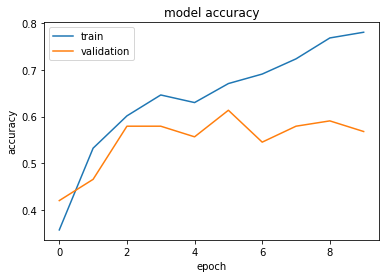

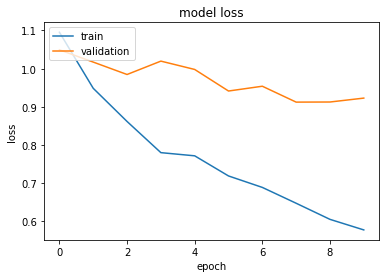

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



---



---



Transfer learning


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(width,width,3),
                                                   include_top=False,
                                                   weights='imagenet')
base_model.trainable = False
num_classes = 3

model = keras.Sequential([
        base_model,
        
        keras.layers.Conv2D(128, 3, activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(16),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model = tf.keras.applications.InceptionV3(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)

base_model.trainable = False
num_classes = 3

model = keras.Sequential([
        base_model,
        
        keras.layers.Conv2D(299, 3, activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(16),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation='softmax')
    ])


ValueError: ignored

In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications
input_shape = (width, width, 3)


base_model = tf.keras.applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(width, width,3))
base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(Dense(128,
                    activation="relu"))


add_model.add(Dense(3, 
                    activation='softmax'))

model = add_model

In [ ]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_24  (None, 2048)              0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_79 (Dense)             (None, 128)               262272    
_________________________________________________________________
dense_80 (Dense)             (None, 3)                 387       
Total params: 22,065,443
Trainable params: 262,659
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy'
                , metrics= ['accuracy'], weighted_metrics=['accuracy'])

batch_size = 32
epochs = 15

In [ ]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/15
8/8 [==============================] - 11s 643ms/step - loss: 1.1647 - accuracy: 0.3455 - weighted_accuracy: 0.3455 - val_loss: 1.0249 - val_accuracy: 0.5114 - val_weighted_accuracy: 0.5114
Epoch 2/15
8/8 [==============================] - 3s 381ms/step - loss: 0.9951 - accuracy: 0.5163 - weighted_accuracy: 0.5163 - val_loss: 0.8911 - val_accuracy: 0.6705 - val_weighted_accuracy: 0.6705
Epoch 3/15
8/8 [==============================] - 3s 382ms/step - loss: 0.8843 - accuracy: 0.6260 - weighted_accuracy: 0.6260 - val_loss: 0.7719 - val_accuracy: 0.7614 - val_weighted_accuracy: 0.7614
Epoch 4/15
8/8 [==============================] - 3s 381ms/step - loss: 0.7770 - accuracy: 0.6911 - weighted_accuracy: 0.6911 - val_loss: 0.7103 - val_accuracy: 0.7727 - val_weighted_accuracy: 0.7727
Epoch 5/15
8/8 [==============================] - 3s 382ms/step - loss: 0.6898 - accuracy: 0.7805 - weighted_accuracy: 0.7805 - val_loss: 0.6356 - val_accuracy: 0.7955 - val_weighted_accuracy: 0.7955

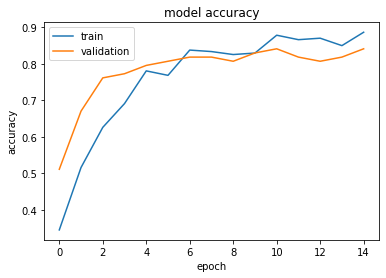

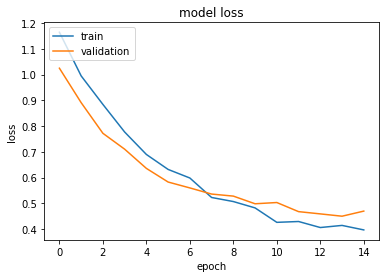

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



---



---


This for try out your image

[[0.6279064  0.29949263 0.07260104]]
real:bull_02.jpg
predict:bull


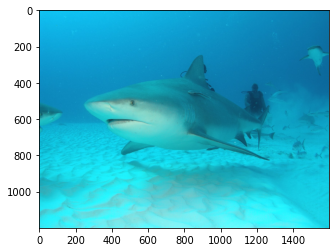

[[0.79831076 0.08004543 0.12164386]]
real:bull_04.jpg
predict:bull


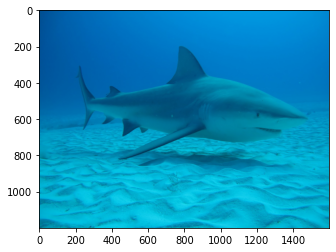

[[0.24020018 0.01033522 0.74946463]]
real:bull_03.jpg
predict:white


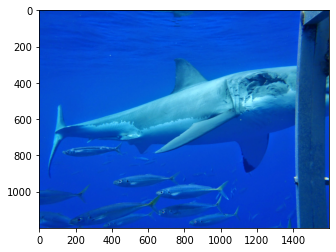

[[0.66828644 0.2948626  0.03685096]]
real:bull_01.jpg
predict:bull


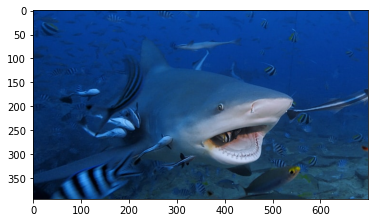

[[0.13403752 0.84923714 0.0167254 ]]
real:tiger_02.jpg
predict:tiger


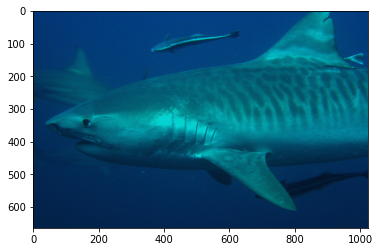

[[0.1192941  0.82275635 0.05794964]]
real:tiger_01.jpg
predict:tiger


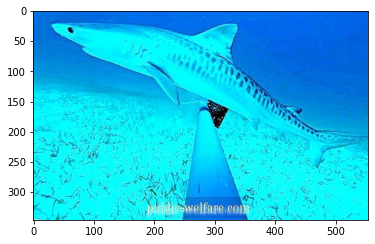

[[0.03359162 0.00432721 0.9620812 ]]
real:white_02.jpg
predict:white


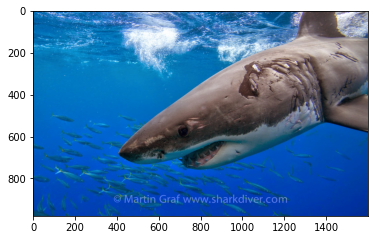

[[0.03841282 0.00917733 0.95240986]]
real:white_03.jpg
predict:white


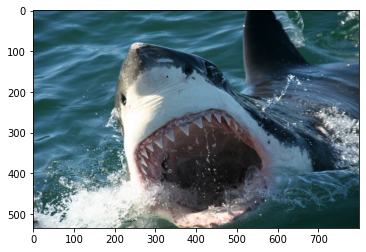

[[0.26044354 0.05646355 0.68309295]]
real:white_01.jpg
predict:white


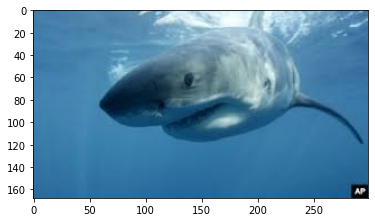

In [ ]:
testpath = '/content/drive/MyDrive/shark_for_test/'
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        if item.split('.')[0] != "":
           
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,width,width,3))
          predict = model.predict(rimg)
          label = ['bull','tiger','white']
          result = label[np.argmax(predict)]
          print(predict)
          print('real:'+str(item))
          print('predict:'+str(result))
          plt.imshow(ori)
          plt.show()

